In [662]:
import matplotlib.style
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft,ifft,fftfreq,fftshift
from scipy import signal
matplotlib.style.use('seaborn')

In [687]:
p = 40
sigm = 0.2
L = 2**6
x = np.linspace(0,1,L,endpoint=True)
dx = x[1]-x[0]
xx = fftfreq(L)
xx[1]-xx[0]

0.015625

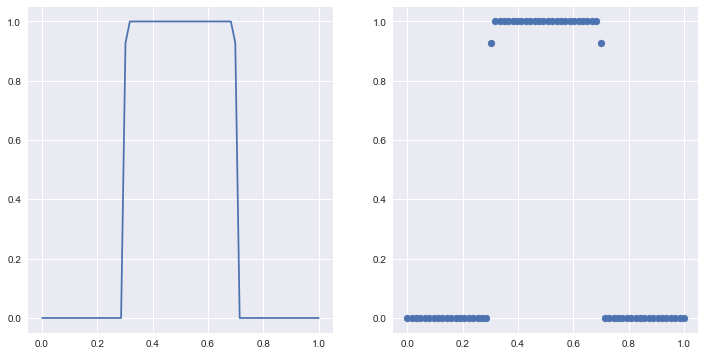

In [688]:
# sig - ширина, р - скорость роста
sig = signal.general_gaussian(L,p=p,sig=sigm*L)
# sig = np.zeros(L)
# sig[32:512] = 1
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x,sig)
plt.subplot(1,2,2)
plt.scatter(x,np.abs(sig))
plt.show()
dw = 1/x[-1]
w = np.arange(-L/2,L/2) * dw
# print(f'Step discrete dw = {dw:.3f}\n'
#       f'step dis x = {dx}')

25.855324857621167


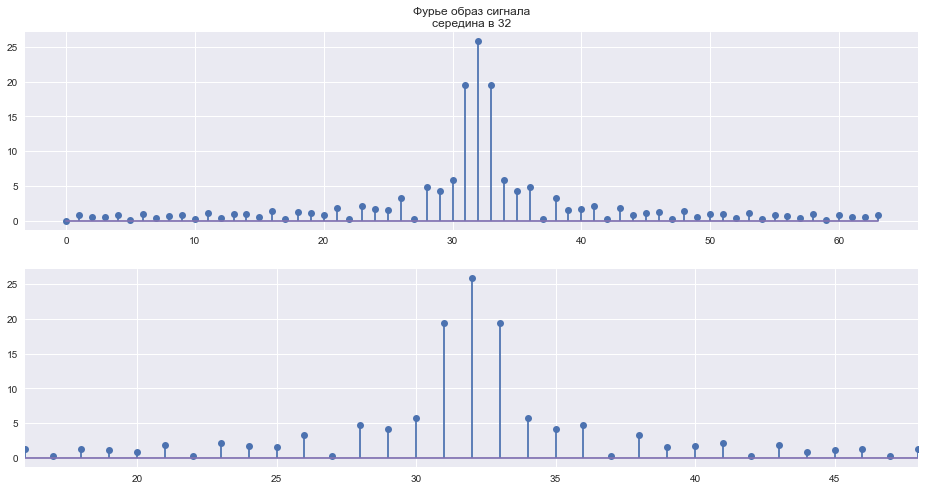

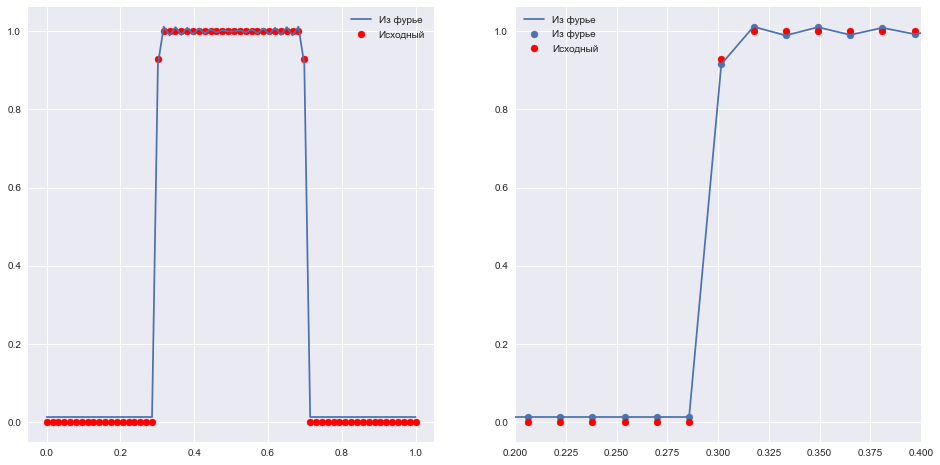

In [693]:
m = 31
ffurg = fft(fftshift(sig))
ffurg = fftshift(ffurg)
# ffurg/= np.max(ffurg)
# plt.scatter(w,np.abs(furg))
# plt.show()
print(np.max(np.abs(ffurg)))
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.stem(np.abs(ffurg),use_line_collection=True)
plt.title(f'Фурье образ сигнала\n'
          f'середина в {np.where(np.abs(ffurg)==np.max(np.abs(ffurg)))[0][0]}')
plt.subplot(2,1,2)
plt.stem(np.abs(ffurg),use_line_collection=True)
plt.xlim(L/2-L/4,L/2+L/4)
plt.show()
# plt.xlim((40,64+24))
k = ffurg.copy()
k[L//2+m:] = 0
k[:L//2-m] = 0
y = fftshift(ifft((fftshift(k))))
# plt.scatter(x,y)
plt.figure(figsize=(16,8))
plt.title('ff')
plt.subplot(1,2,1)
plt.plot(x,np.abs(y),label='Из фурье')
plt.scatter(x,sig,label='Исходный',c='r')
plt.legend()
plt.subplot(1,2,2)
s = int(x.shape[0]*sigm)
sm= int(s - sigm*s)
sp =  int(s + sigm*s)
plt.plot(x,np.abs(y),label='Из фурье')
plt.scatter(x,np.abs(y),label='Из фурье')
plt.scatter(x,sig,label='Исходный',c='r')
plt.xlim(0.2,0.4)
plt.legend()
print('\n\n')